In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.style.use("ggplot")

import seaborn as sns

import pandas as pd

from Bio import SeqIO
from Bio.Seq import Seq

In [5]:
df = pd.read_csv("/mnt/c/Users/pc/Downloads/barcodes.csv")

df.head(10)

,BC30,ID,BC14
0,TGACACACACACACACACACACTGACCATG,bc14-001,GTTTAGATATACAC
1,TGACACACACTGACTGACTGACTGACACCA,bc14-002,TAACTTCGCCTGCT
2,TGACACCAACTGACACACACACGTACTGAC,bc14-003,ATCCCCAAAGAGGA
3,TGTGACACACGTACACACCAACCAACTGAC,bc14-004,TCATATCAGCCGTC
4,TGTGACGTACCAACTGACTGACGTACACTG,bc14-005,AGGTGTCCGGTATG
5,TGGTACACACCAACACACGTACTGACGTCA,bc14-006,ATATGTTCTGGCAT
6,TGGTACGTACTGACGTACGTACTGACCAAC,bc14-007,ACACGCAGGAAACT
7,TGCAACACACTGACTGACCAACTGACTGTG,bc14-008,GAGTTGTAAGAGAC
8,TGCAACACACGTACCAACACACACACGTAC,bc14-009,AGCAGAAAAGTTCG
9,TGCAACTGACGTACGTACGTACGTACTGAC,bc14-010,ATTATTCTGCGCCT


In [6]:
barcode = df['BC14']
id = df['ID']
linker = 'TGGT'
primer = df['BC30']

In [7]:
label = {a:{b+linker+x:0 for x in primer} for a,b in zip(id[:10], barcode[:10])}

In [8]:
len(list(label['bc14-010'].keys())[:10000])

10000

In [9]:
myf= "/mnt/c/Users/pc/Downloads/qc_processed_barcode_1/N70_r1_qc_processed/N70_r1_qc_processed.fastq"
startlist=[]
for record in SeqIO.parse(myf, "fastq"):
    startlist.append(str(record.seq))

In [10]:
SEQ = "".join(startlist)

In [8]:
print(len(SEQ), type(SEQ))

255430097 <class 'str'>


In [44]:
saved = {}

where = list(label['bc14-005'].keys())[80000:90000]

In [45]:
for i in where:
    saved[i] = Seq(SEQ).count_overlap(i)

In [46]:
with open('bc14-005_90000.txt', 'w') as f:
    print(saved, file=f)

In [11]:
base14 = {a:0 for a in barcode[:10]}

for x in list(base14.keys()):
    base14[x] = Seq(SEQ).count_overlap(x)

base14

{'GTTTAGATATACAC': 124656,
 'TAACTTCGCCTGCT': 350912,
 'ATCCCCAAAGAGGA': 135382,
 'TCATATCAGCCGTC': 111048,
 'AGGTGTCCGGTATG': 85648,
 'ATATGTTCTGGCAT': 399719,
 'ACACGCAGGAAACT': 73266,
 'GAGTTGTAAGAGAC': 89211,
 'AGCAGAAAAGTTCG': 1448,
 'ATTATTCTGCGCCT': 196193}

In [11]:
base30 = {a:0 for a in primer[:10]}

for x in list(base30.keys()):
    base30[x] = Seq(SEQ).count_overlap(x)

base30

{'TGACACACACACACACACACACTGACCATG': 0,
 'TGACACACACTGACTGACTGACTGACACCA': 0,
 'TGACACCAACTGACACACACACGTACTGAC': 0,
 'TGTGACACACGTACACACCAACCAACTGAC': 0,
 'TGTGACGTACCAACTGACTGACGTACACTG': 0,
 'TGGTACACACCAACACACGTACTGACGTCA': 0,
 'TGGTACGTACTGACGTACGTACTGACCAAC': 72,
 'TGCAACACACTGACTGACCAACTGACTGTG': 339,
 'TGCAACACACGTACCAACACACACACGTAC': 0,
 'TGCAACTGACGTACGTACGTACGTACTGAC': 0}

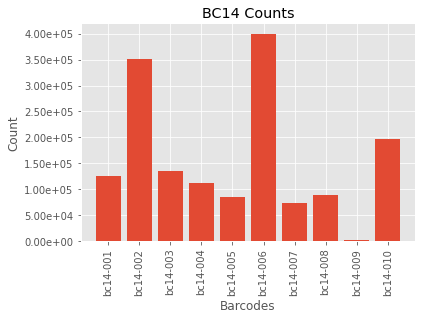

In [27]:
plt.bar(id[:10], base14.values())
plt.title('BC14 Counts')
plt.xlabel('Barcodes')
plt.ylabel('Count')
plt.xticks(rotation='vertical')

plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

plt.show()

In [1]:
print('deneme2')

deneme2
